# Requirements

In [120]:
# Add as many imports as you need.
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedKFold
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score

# Laboratory Exercise - Run Mode (8 points)

## Mobile Device Usage and User Behavior Dataset
The dataset contains detailed information on 700 mobile device users, capturing various usage patterns and behavior classifications. The features include app usage time, screen-on time, battery drain, data consumption, and more. These metrics provide insights into the user's daily interactions with their device, such as how much time is spent on apps, the amount of screen activity, battery usage, and mobile data consumption. In addition, user demographics like age and gender are included, as well as the device model and operating system. The 'user behavior class' attribute categorizes users based on their usage patterns, ranging from light to extreme behavior. All features, except for the 'user behavior class', can be used as input variables for analysis and modeling, while the 'user behavior class' serves as the target variable for prediction. This dataset offers valuable insights for studying mobile user behavior and can be used for building predictive models in the domain of mobile technology and applications.

Load the dataset into a `pandas` data frame.

In [20]:
# Write your code here. Add as many boxes as you need.
df = pd.read_csv('datasets/user_behavior_data.csv')

In [21]:
df

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122.0,40.0,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944.0,47.0,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,NaN,42.0,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871.0,20.0,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988.0,31.0,Female,3
...,...,...,...,...,...,...,...,...,...,...,...
695,696,iPhone 12,iOS,92,3.9,1082,26,NaN,22.0,Male,2
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,NaN,59.0,Male,4
697,698,Google Pixel 5,Android,99,3.1,942,22,457.0,50.0,Female,2
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224.0,44.0,Male,1


In [22]:
df.drop(columns='User ID', inplace=True)

In [23]:
df

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,Google Pixel 5,Android,393,6.4,1872,67,1122.0,40.0,Male,4
1,OnePlus 9,Android,268,4.7,1331,42,944.0,47.0,Female,3
2,Xiaomi Mi 11,Android,154,4.0,761,32,NaN,42.0,Male,2
3,Google Pixel 5,Android,239,4.8,1676,56,871.0,20.0,Male,3
4,iPhone 12,iOS,187,4.3,1367,58,988.0,31.0,Female,3
...,...,...,...,...,...,...,...,...,...,...
695,iPhone 12,iOS,92,3.9,1082,26,NaN,22.0,Male,2
696,Xiaomi Mi 11,Android,316,6.8,1965,68,NaN,59.0,Male,4
697,Google Pixel 5,Android,99,3.1,942,22,457.0,50.0,Female,2
698,Samsung Galaxy S21,Android,62,1.7,431,13,224.0,44.0,Male,1


In [24]:
df['User Behavior Class'].unique()

array([4, 3, 2, 5, 1])

# Encoder

In [58]:
encoder = LabelEncoder()
one_hot_encoder = OneHotEncoder()

df['Device Model'] = encoder.fit_transform(df['Device Model'])
df['Gender'] = encoder.fit_transform(df['Gender'])

In [55]:
df

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,0,Android,393,6.4,1872,67,1122.0,40.0,1,4
1,1,Android,268,4.7,1331,42,944.0,47.0,0,3
2,3,Android,154,4.0,761,32,NaN,42.0,1,2
3,0,Android,239,4.8,1676,56,871.0,20.0,1,3
4,4,iOS,187,4.3,1367,58,988.0,31.0,0,3
...,...,...,...,...,...,...,...,...,...,...
695,4,iOS,92,3.9,1082,26,NaN,22.0,1,2
696,3,Android,316,6.8,1965,68,NaN,59.0,1,4
697,0,Android,99,3.1,942,22,457.0,50.0,0,2
698,2,Android,62,1.7,431,13,224.0,44.0,1,1


In [27]:
df['Operating System'].unique()

array(['Android', 'iOS', nan], dtype=object)

In [28]:
df.isnull().sum()

Device Model                    0
Operating System               70
App Usage Time (min/day)        0
Screen On Time (hours/day)      0
Battery Drain (mAh/day)         0
Number of Apps Installed        0
Data Usage (MB/day)           140
Age                            35
Gender                          0
User Behavior Class             0
dtype: int64

Preprocess the input and the output variables appropriately.

In [ ]:
# Write your code here. Add as many boxes as you need.


Explore the dataset using visualizations of your choice.

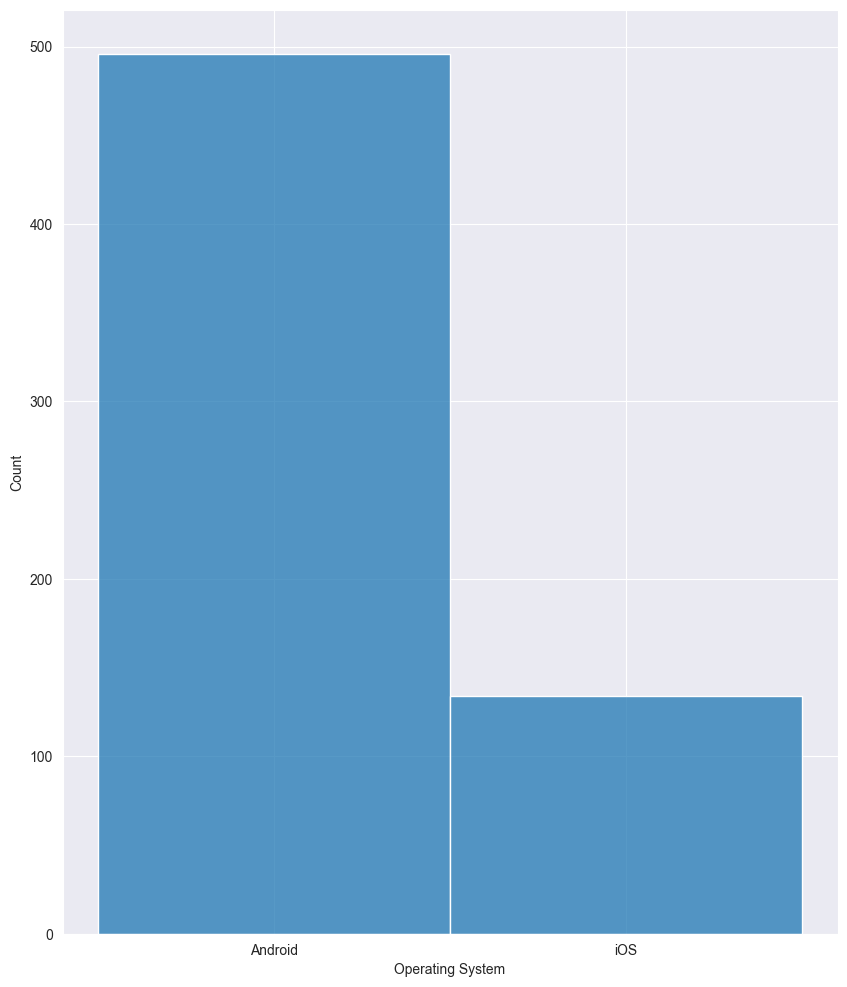

In [33]:
plt.figure(figsize=(10,12))
sns.histplot(df['Operating System'])
plt.show()

In [34]:
df['Operating System'].value_counts()

Operating System
Android    496
iOS        134
Name: count, dtype: int64

In [35]:
df['Operating System'].unique()

array(['Android', 'iOS', nan], dtype=object)

In [62]:
df['Operating System'] = df['Operating System'].fillna(df['Operating System'].mode()[0])
df['Operating System'] = encoder.fit_transform(df['Operating System'])

In [63]:
df

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,0,0,393,6.4,1872,67,1122.0,40.0,1,4
1,1,0,268,4.7,1331,42,944.0,47.0,0,3
2,3,0,154,4.0,761,32,NaN,42.0,1,2
3,0,0,239,4.8,1676,56,871.0,20.0,1,3
4,4,1,187,4.3,1367,58,988.0,31.0,0,3
...,...,...,...,...,...,...,...,...,...,...
695,4,1,92,3.9,1082,26,NaN,22.0,1,2
696,3,0,316,6.8,1965,68,NaN,59.0,1,4
697,0,0,99,3.1,942,22,457.0,50.0,0,2
698,2,0,62,1.7,431,13,224.0,44.0,1,1


In [64]:
df.isnull().sum()

Device Model                    0
Operating System                0
App Usage Time (min/day)        0
Screen On Time (hours/day)      0
Battery Drain (mAh/day)         0
Number of Apps Installed        0
Data Usage (MB/day)           140
Age                             0
Gender                          0
User Behavior Class             0
dtype: int64

Check if the dataset is balanced.

In [32]:
# Write your code here. Add as many boxes as you need.
df['User Behavior Class'].value_counts()

User Behavior Class
2    146
3    143
4    139
5    136
1    136
Name: count, dtype: int64

<Axes: xlabel='User Behavior Class', ylabel='Count'>

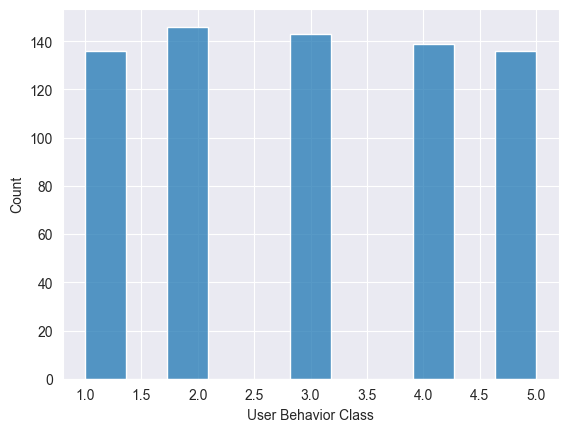

In [41]:
sns.histplot(df['User Behavior Class'])

## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [6]:
# Write your code here. Add as many boxes as you need.
missing_values_percentage = df.isnull().sum() / len(df) 
missing_values_percentage * 100

Device Model                   0.0
Operating System              10.0
App Usage Time (min/day)       0.0
Screen On Time (hours/day)     0.0
Battery Drain (mAh/day)        0.0
Number of Apps Installed       0.0
Data Usage (MB/day)           20.0
Age                            5.0
Gender                         0.0
User Behavior Class            0.0
dtype: float64

## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts.

<Axes: >

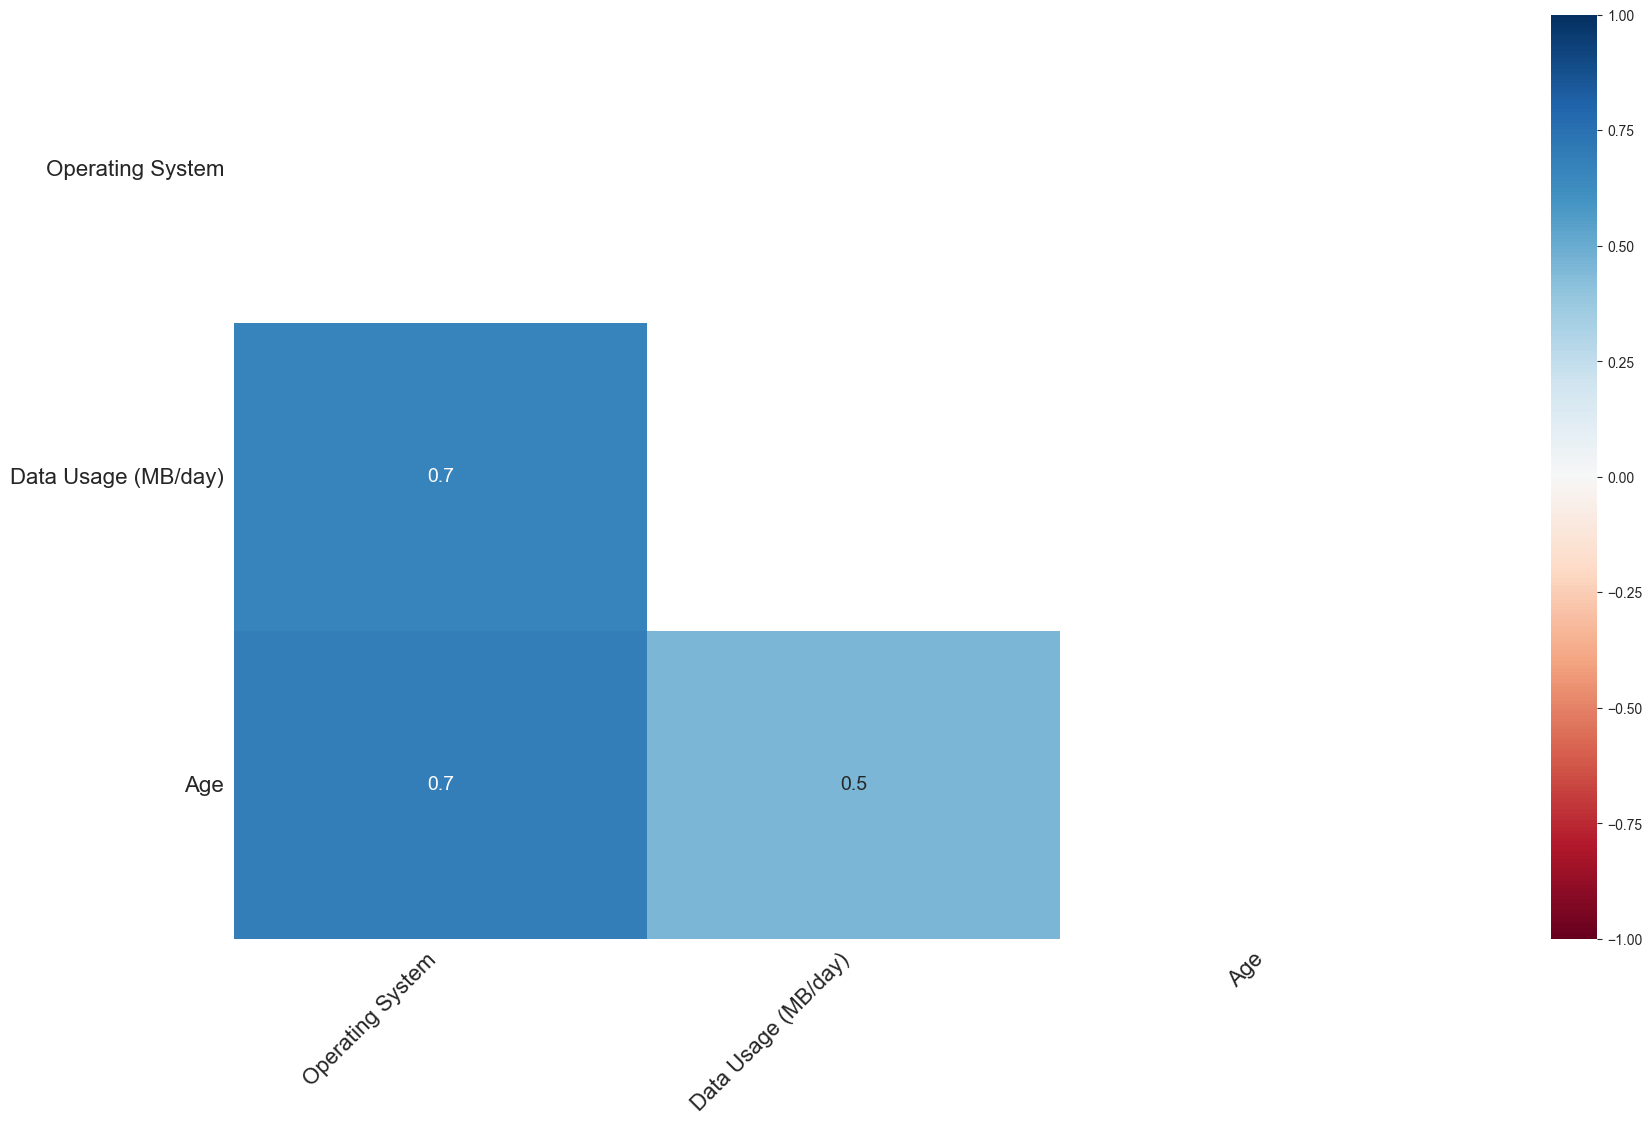

In [45]:
msno.heatmap(df)

<Axes: >

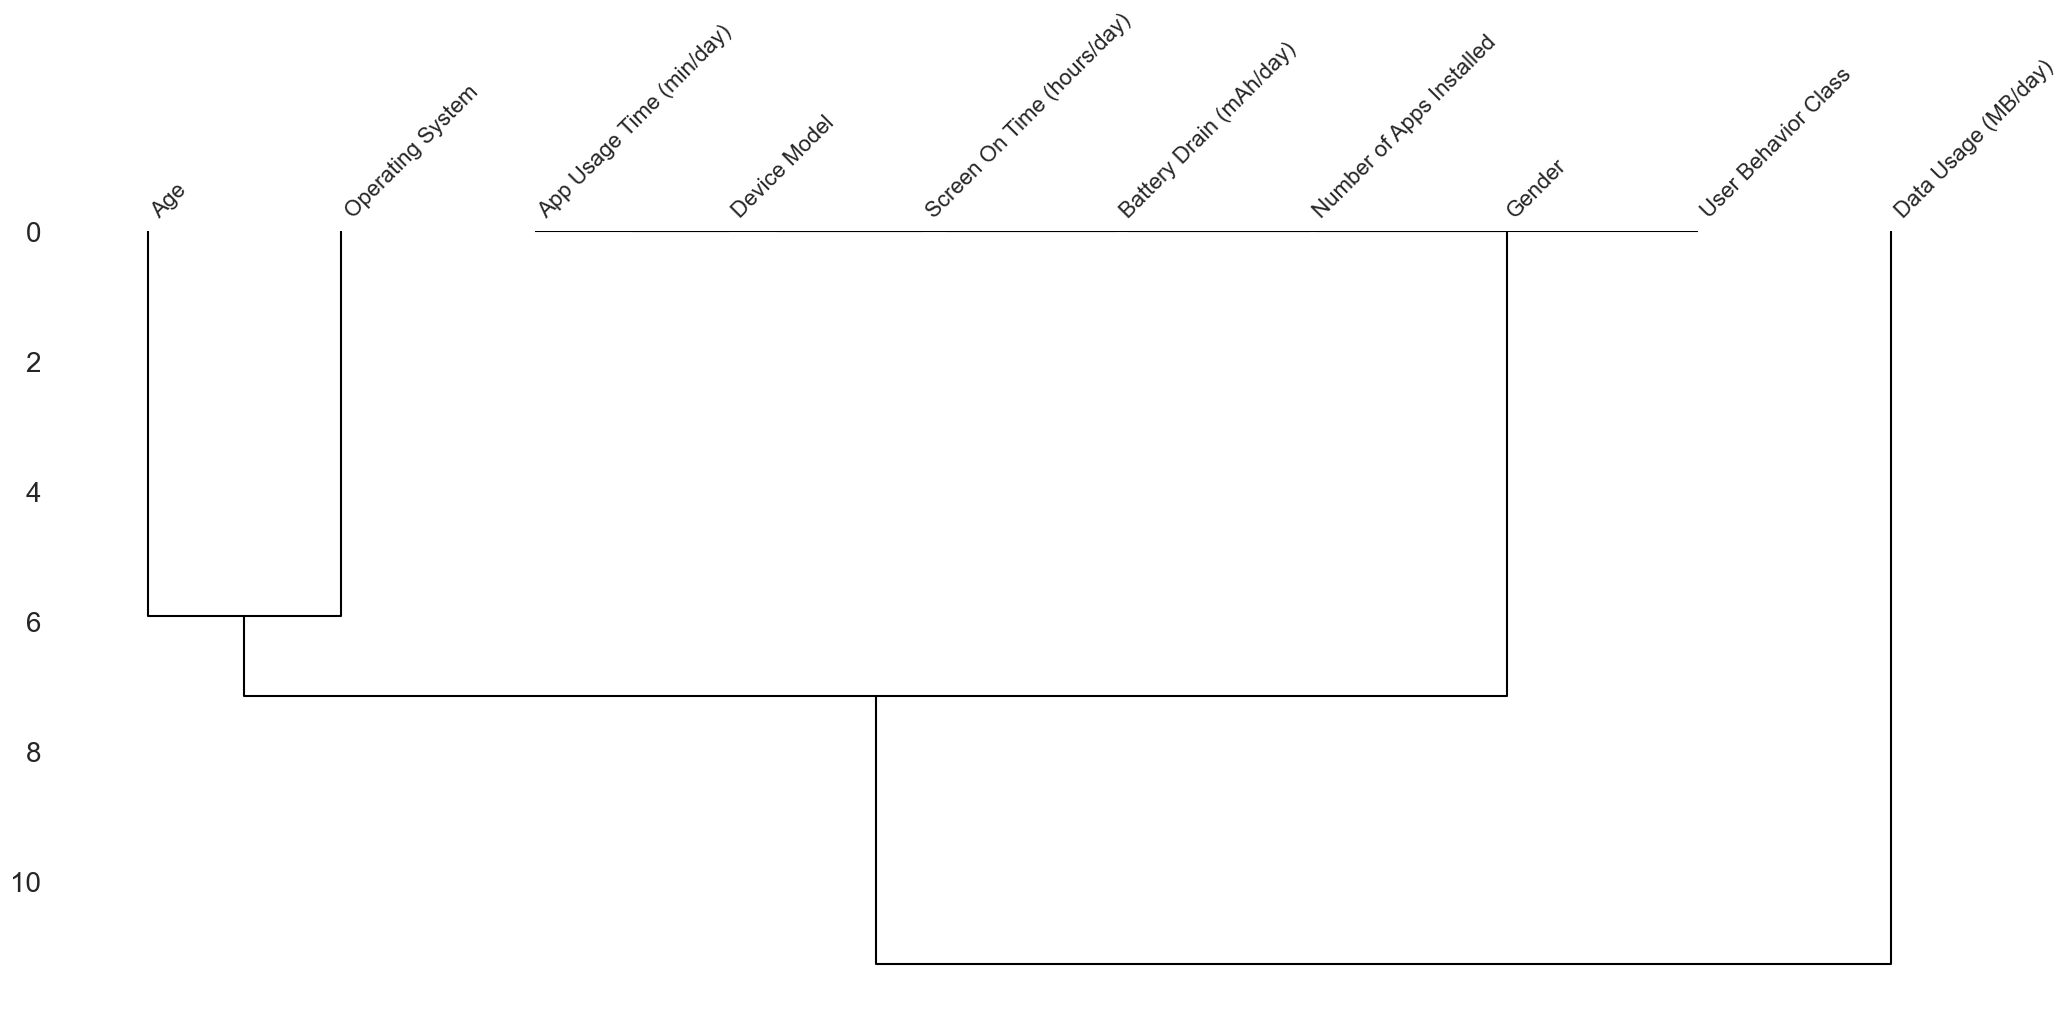

In [42]:
msno.dendrogram(df)

<Axes: >

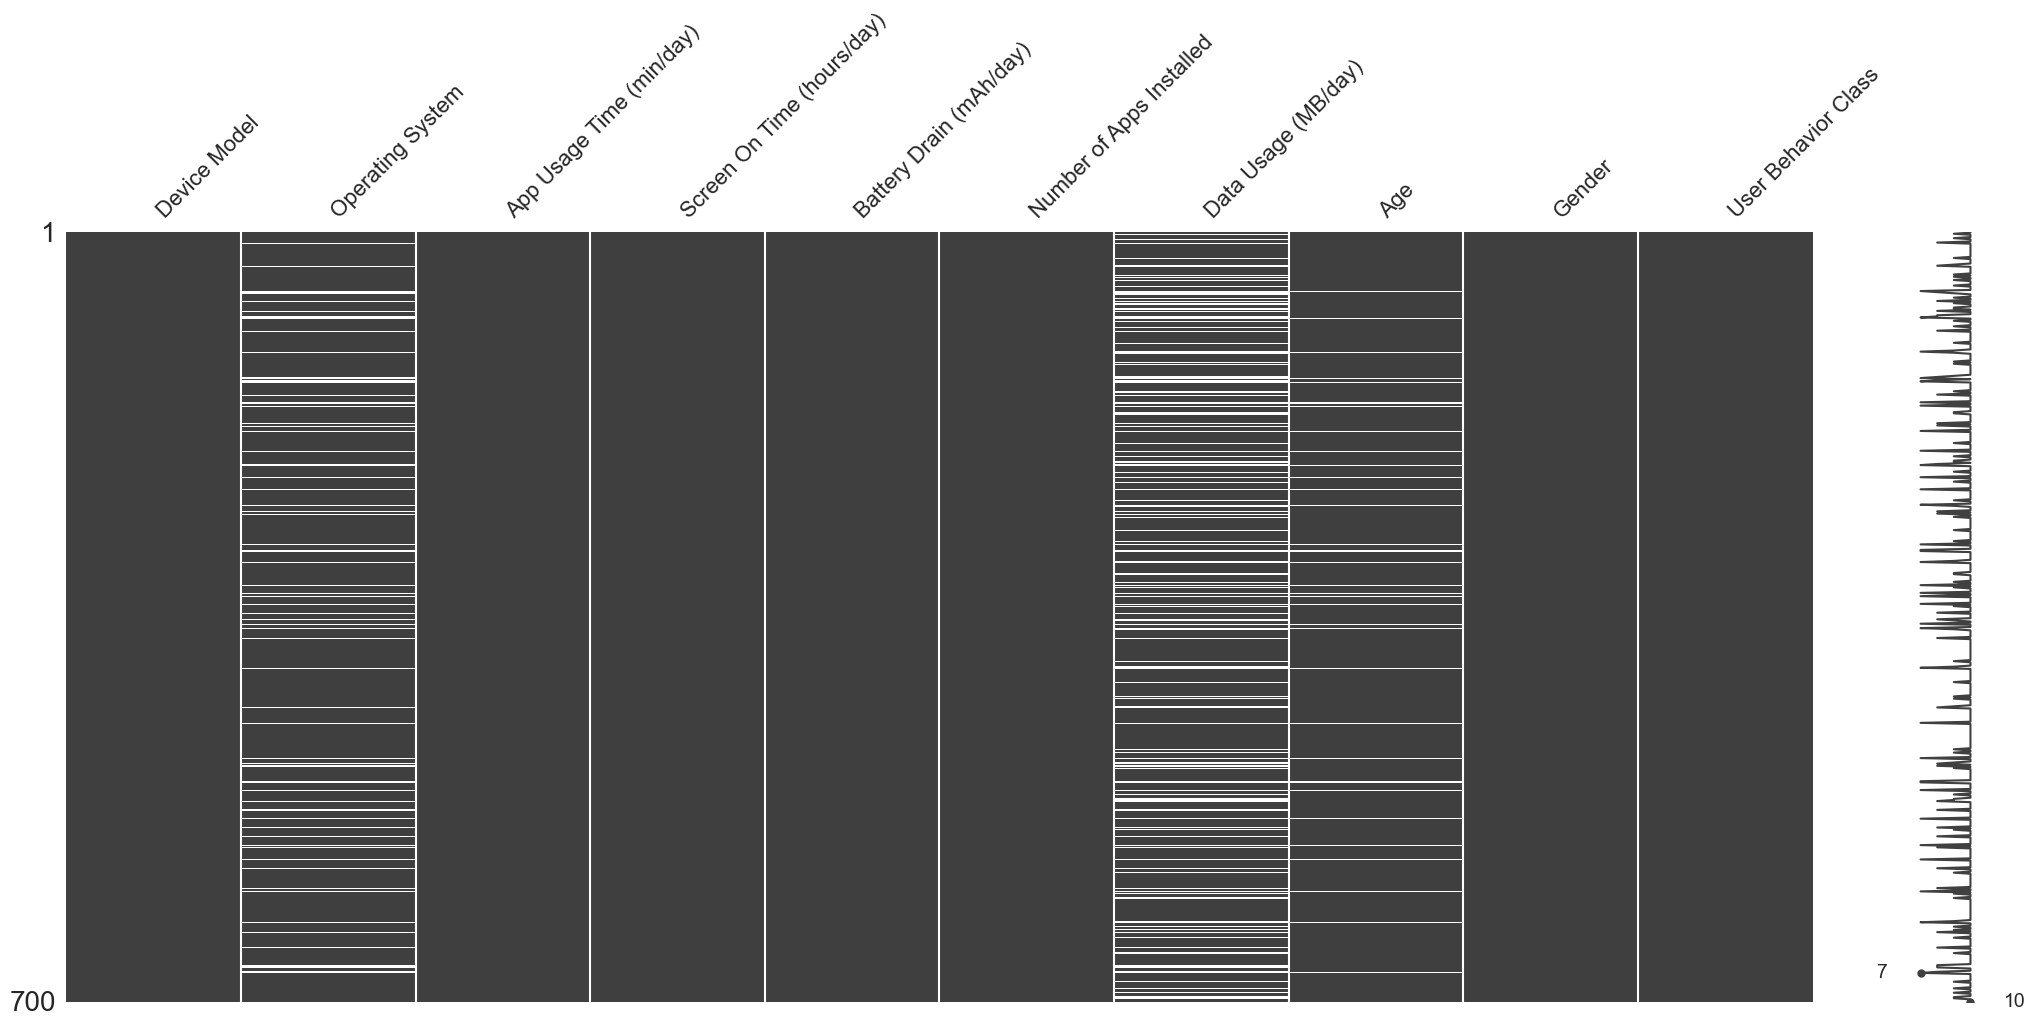

In [43]:
# Write your code here. Add as many boxes as you need.
msno.matrix(df)

In [46]:
df.isnull().sum()

Device Model                    0
Operating System               70
App Usage Time (min/day)        0
Screen On Time (hours/day)      0
Battery Drain (mAh/day)         0
Number of Apps Installed        0
Data Usage (MB/day)           140
Age                            35
Gender                          0
User Behavior Class             0
dtype: int64

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

In [76]:
# Write your code here. Add as many boxes as you need.
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Age', 'Data Usage (MB/day)']])

knn_imputer = KNNImputer(n_neighbors=5)
imputed_data = knn_imputer.fit_transform(scaled_data)

df[['Age', 'Data Usage (MB/day)']] = scaler.inverse_transform(imputed_data) #the imputation process was applied to a scaled version of the data, but the imputed values were not reassigned back to the original DataFrame, so we must reassign them back to the original df

In [69]:
scaled_data

array([[0.53658537, 0.42659975],
       [0.70731707, 0.35215391],
       [0.58536585,        nan],
       ...,
       [0.7804878 , 0.14847344],
       [0.63414634, 0.05102468],
       [0.12195122, 0.30363864]])

In [74]:
imputed_data

array([[0.53658537, 0.42659975],
       [0.70731707, 0.35215391],
       [0.58536585, 0.30447512],
       ...,
       [0.7804878 , 0.14847344],
       [0.63414634, 0.05102468],
       [0.12195122, 0.30363864]])

In [75]:
df.isnull().sum()

Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

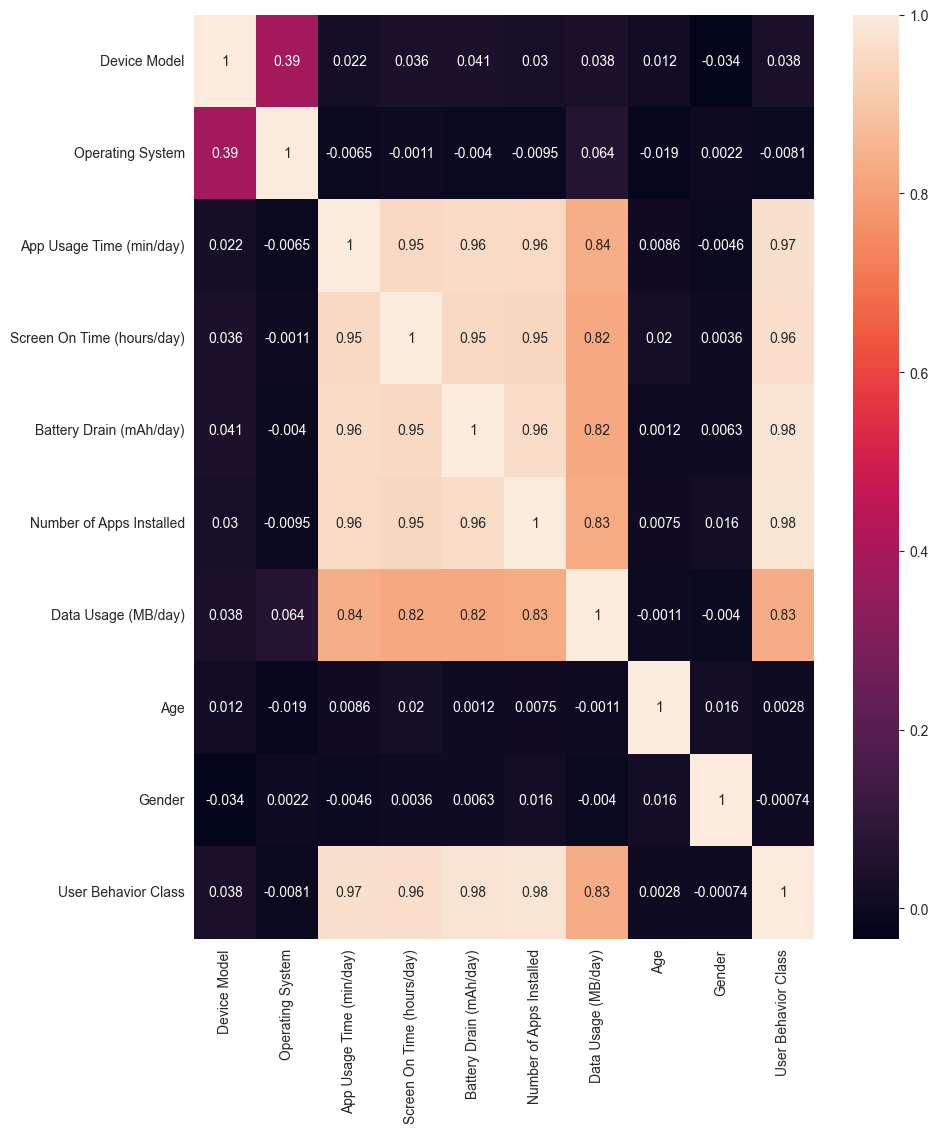

In [77]:
correlation_features = df.corr()

plt.figure(figsize=(10,12))
sns.heatmap(correlation_features, annot=True)
plt.show()

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

In [81]:
x = df.drop(columns=['User Behavior Class'])
y = df['User Behavior Class']

In [100]:
# Write your code here. Add as many boxes as you need.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

## Feature Scaling
Standardize the features appropriately.

In [122]:
# Write your code here. Add as many boxes as you need.
min_max_scaler = MinMaxScaler()

x_train = min_max_scaler.fit_transform(x_train)
x_test = min_max_scaler.transform(x_test)

## Model Selection

In [84]:
df['User Behavior Class'].unique()

array([4, 3, 2, 5, 1])

Choose and train an approriate model for the given task.

In [106]:
import numpy as np

y_train_adjusted = np.array(y_train) - 1  # Subtract 1 from all labels

In [129]:
# Write your code here. Add as many boxes as you need.
model = KNeighborsClassifier(n_neighbors=5)

model.fit(x_train, y_train)

KNeighborsClassifier()

Use the trained model to make predictions for the test set.

In [130]:
# Write your code here. Add as many boxes as you need.
y_pred = model.predict(x_test)

Assess the performance of the model by using different classification metrics.

In [131]:
# Write your code here. Add as many boxes as you need.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.89      0.93      0.91        27
           2       0.93      0.90      0.92        31
           3       0.92      1.00      0.96        33
           4       1.00      0.92      0.96        24
           5       1.00      0.96      0.98        25

    accuracy                           0.94       140
   macro avg       0.95      0.94      0.94       140
weighted avg       0.94      0.94      0.94       140



# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune at least one hyper-parameter using a cross-validation with grid search. This involves systematically experimenting with various values for the hyper-parameter(s) and evaluating the model's performance using cross-validation. Upon determining the most suitable value(s) for the hyper-parameter(s), evaluate the model's performance on a test set for final assessment.

Hint: Use the `GridCVSearch` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

In [132]:
# Write your code here. Add as many boxes as you need.
x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.1)

## Feature Scaling
Standardize the features appropriately.

In [133]:
# Write your code here. Add as many boxes as you need.
min_max_scaler = MinMaxScaler()

x_train2_scaled = min_max_scaler.fit_transform(x_train2)
x_test2_scaled = min_max_scaler.transform(x_test2)

## Fine-tuning the Hyperparameters
Experiment with various values for the chosen hyperparameter(s) and evaluate the model's performance using cross-validation.

In [135]:
# Write your code here. Add as many boxes as you need.

param_grid = {
    'n_neighbors' : [3, 5, 7, 9],
    'weights' : ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')

grid_search.fit(x_train2_scaled, y_train2)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [136]:
grid_search.best_score_

0.9888888888888889

## Final Assessment of the Model Performance
Upon determining the most suitable hyperparameter(s), evaluate the model's performance on a test set for final assessment.

In [141]:
# Write your code here. Add as many boxes as you need.
best_model = grid_search.best_estimator_

y_pred2 = best_model.predict(x_test2_scaled)

print(accuracy_score(y_test2, y_pred2))
print(classification_report(y_test2, y_pred2))
print(best_model)

0.9857142857142858
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       0.93      1.00      0.97        14
           3       1.00      0.94      0.97        16
           4       1.00      1.00      1.00        14
           5       1.00      1.00      1.00         7

    accuracy                           0.99        70
   macro avg       0.99      0.99      0.99        70
weighted avg       0.99      0.99      0.99        70

KNeighborsClassifier(metric='manhattan', n_neighbors=9, weights='distance')
